## Purpose of the following library is to return performance metrics from a set of classification algorithms intended to parse unique video-based behavioral time-series data. This time-series data is from a set of experiments performed in 2019 of reaches to a handle among different subjects, dates, and experimental sessions. The trial positions are randomized. We wish to classify individual behavioral phenotypes. These phenotypes may be found in an unsupervised or supervised manner.

#### Class inputs: 

In [1]:
import os
import pdb
import pandas as pd
os.chdir('../')
import utils.classifier_utils as CL
from ReachClassifier.ReachClassifier import classifier 
CL.set_seed
# Load in data
labels = CL.load_saved_csv_dataframes('data/labels/LABELS.csv')
labels = labels.drop("Unnamed: 0", axis=1)
labels = CL.preprocess_labels(labels)
discrete_df = CL.load_saved_csv_dataframes("data/DataFrames/DISCRETE_DF.csv")
discrete_df_extended = CL.load_saved_csv_dataframes("data/DataFrames/DISCRETE_DF_extended.csv")
# time_series_df = CL.load_saved_csv_dataframes("/data/DataFrames/TIMESERIES_DF.csv")
#time_series_df_extended_labels = pd.concat([time_series_df, labels], axis=1)
df_extended_labels = pd.concat([discrete_df_extended, labels], axis=1)

# Create catagorical dataframes for analysis.
notNull_data, Null_data, singleReach_data, multipleReach_data, rightHand_data, leftHand_data = CL.generalize_data_to_labels(df_extended_labels)

# Create manifold frames for each catagory.

reaching_data = pd.concat([singleReach_data,multipleReach_data])
handedness_data = pd.concat([rightHand_data, leftHand_data])
# Perform PCA, save each model of PCA
#discrete_df_extended.drop(labels.columns,inplace=True,axis=1)
data_extended, model_null_extended = CL.doPCA(CL.pre(discrete_df_extended),60, labels)
null_fname = 'null_PCA.sav'
CL.save_PC_components(model_null_extended, null_fname)


reaching_data.drop(labels.columns, inplace=True, axis=1)
data_extended_number, model_number_extended = CL.doPCA(CL.pre(reaching_data),60, labels)
num_fname = 'num_reach_PCA.sav'
CL.save_PC_components(model_number_extended, num_fname)

handedness_data.drop(labels.columns, inplace=True, axis=1)
data_extended_hand, model_hand_extended = CL.doPCA(CL.pre(handedness_data),60, labels)
hand_fname = 'hand_PCA.sav'
CL.save_PC_components(model_hand_extended, hand_fname)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Separate Data based on Class

0.0    325
1.0    325
Name: Trial Type, dtype: int64


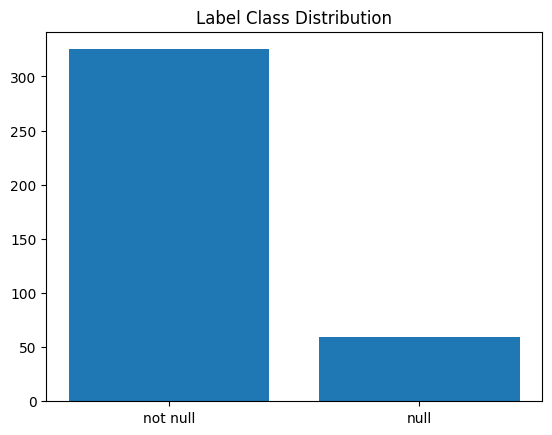

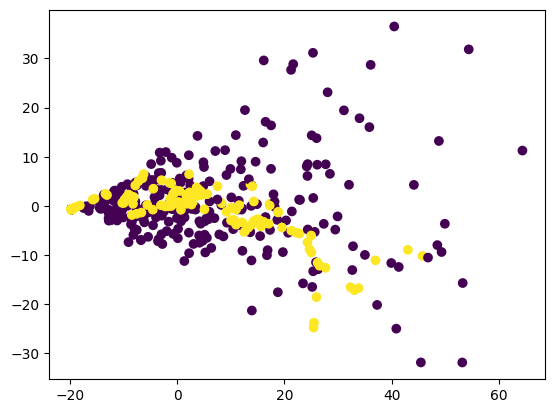

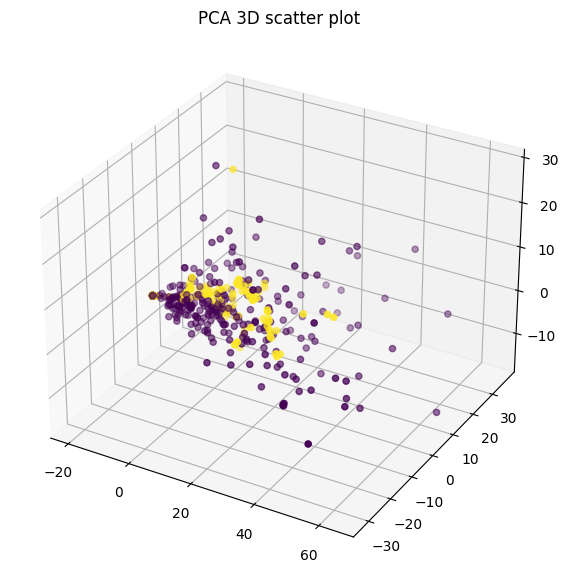

Avg cv accuracy: 0.533
Avg cv accuracy: 0.887
Avg cv accuracy: 0.87


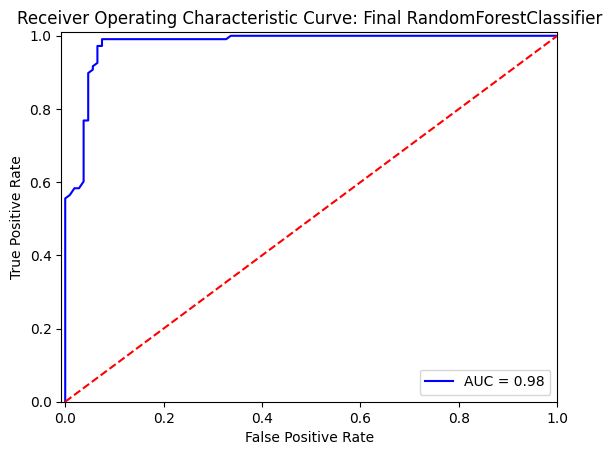

Num PCs: 3
train acc: 0.7954022988505747, val acc: 0.7534883720930232, roc_auc: 0.8553997923156801
Num PCs: 4
train acc: 0.8045977011494253, val acc: 0.772093023255814, roc_auc: 0.9039460020768432
Num PCs: 5
train acc: 0.8459770114942529, val acc: 0.813953488372093, roc_auc: 0.9328487365870545
Num PCs: 6
train acc: 0.8574712643678162, val acc: 0.8186046511627907, roc_auc: 0.9238058151609553
Num PCs: 7
train acc: 0.8551724137931034, val acc: 0.8465116279069769, roc_auc: 0.9469972308757356
Num PCs: 8
train acc: 0.864367816091954, val acc: 0.8325581395348838, roc_auc: 0.9651696088611976
Num PCs: 9
train acc: 0.8850574712643677, val acc: 0.8511627906976745, roc_auc: 0.9726548978885428
Num PCs: 10
train acc: 0.8965517241379309, val acc: 0.8511627906976745, roc_auc: 0.9694963655244029
Num PCs: 11
train acc: 0.8965517241379309, val acc: 0.8558139534883722, roc_auc: 0.9740394600207684
Num PCs: 12
train acc: 0.8781609195402298, val acc: 0.8651162790697675, roc_auc: 0.9740394600207685
Num PCs: 1

In [2]:

null_classifier = classifier(data_extended, 'Trial Type')
convert_dict = { 0:"not null", 1:"null"}
null_classifier.main(convert_dict, sn_k=False)
null_classifier.plotPCAROC(data_extended, 'Trial Type', 60)

0.0    175
1.0    175
Name: Num Reaches, dtype: int64


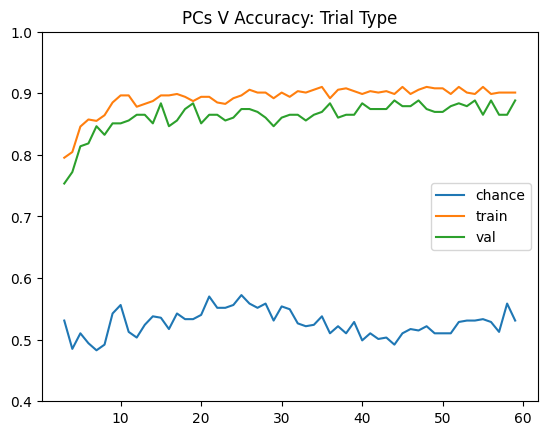

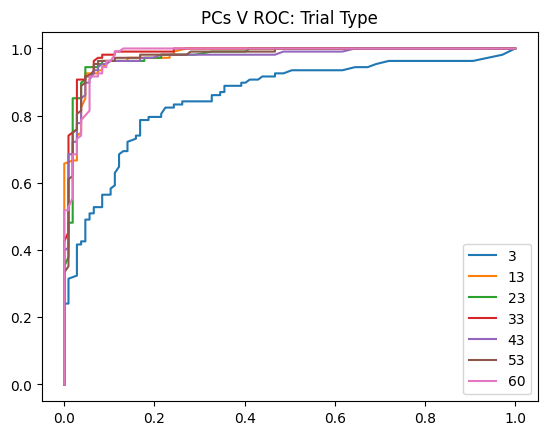

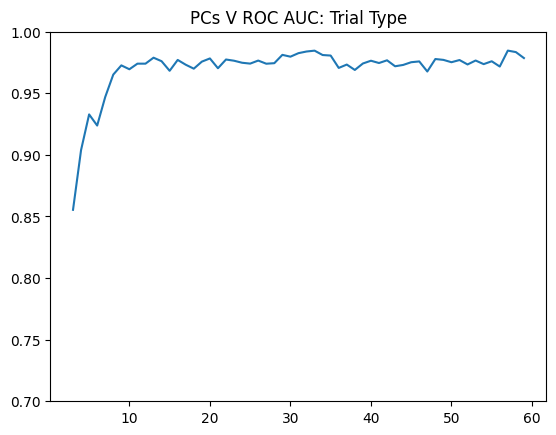

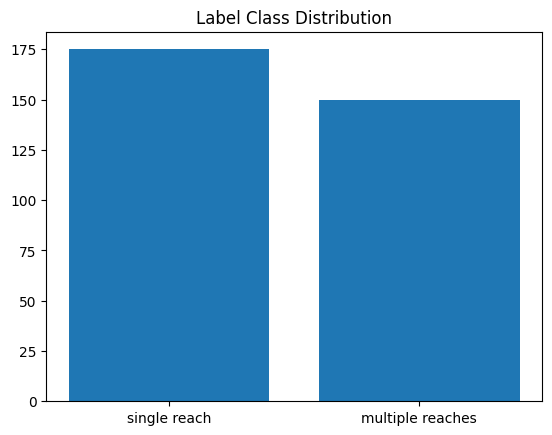

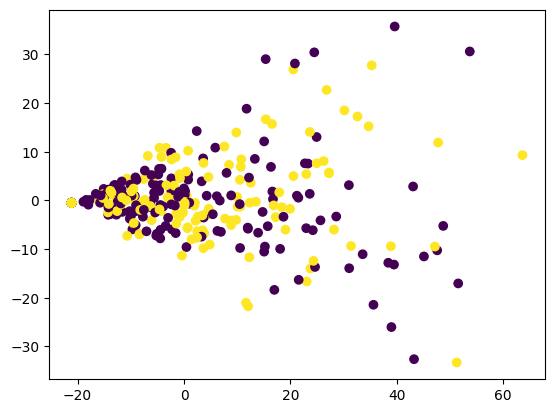

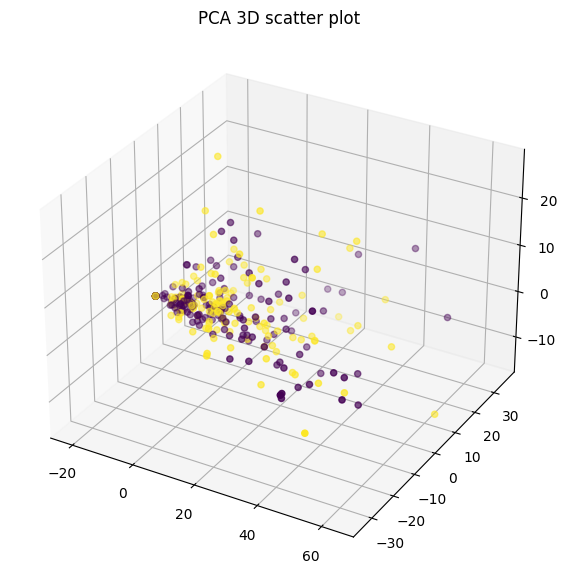

Avg cv accuracy: 0.525
Avg cv accuracy: 0.539
Avg cv accuracy: 0.595


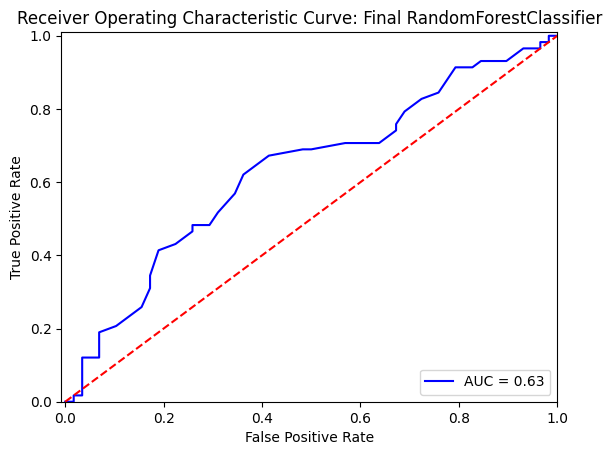

NameError: name 'number_classifer' is not defined

In [3]:
data_extended_number = data_extended_number[data_extended_number['PC1'].notna()]
number_classifier = classifier(data_extended_number, 'Num Reaches')

convert_dict = { 0:"single reach", 1:"multiple reaches"}
number_classifier.main(convert_dict, sn_k=False)
number_classifer.plotPCAROC(data_extended_number, 'Num Reaches', 60)

In [ ]:
data_extended_hand = data_extended_hand[data_extended_hand['PC1'].notna()]
hand_classifier = classifier(data_extended_hand, 'Which Hand')
convert_dict = { 0:"left hand", 1:"right hand"}
hand_classifier.main(convert_dict, sn_k=False)
hand_classifier.plotPCAROC(data_extended_hand, 'Which Hand', 60)

# We now wish to optimize our classification models.
## The first method of optimization is to perform hyper-parameter tuning of selected models involved in our attempt at behavioral classification. 
## We then aim to use a ensemble method with a weighted majority-voting scheme to predict phenotypes. 
## The second involves a data flywheel between current reaching dataset and annotated classification attempts on un-marked data. 
## Here we demonstrate the former method using a set of models and their hyperparameters.

In [ ]:
# each algorithm has unique hyperparameters that can be tuned, as well as methods to visualize these networks.
# for input models, tunable_parameter_ranges:
# E

In [ ]:
models = [
    [RandomForestClassifier(n_estimators=150), RandomForestClassifier(n_estimators=150), "RaForest"],
    [LogisticRegression(), LogisticRegression(), "LogRegr"],
    [SVC(kernel='linear', probability=True), SVC(kernel='linear', probability=True), "SVM"],
    [LDA(), LDA(), "LDA"],
    [neighbors.KNeighborsClassifier(n_neighbors=5),  neighbors.KNeighborsClassifier(n_neighbors=5), "KNN"],
    [AdaBoostClassifier(n_estimators=100, random_state=0), AdaBoostClassifier(n_estimators=100, random_state=0), "AdaBoost"]
    
]

# LDA

In [ ]:
# TODO

# DEBUGGING BELOW

# Initial Accuracies

## Hypterparameter Tuning

In [ ]:
sn_n_estimators = 150 #tune_hyperparams(sn_X_train, sn_Y_train)
sn_n_estimators

In [ ]:
# Depth of trees
def tune_hyperparams(X_train, Y_train):
    # Tuning hyperparameters for RandomForestClassifier
    # may take a bit to run
    # reference https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

    # creat model
    model = RandomForestClassifier(random_state=random_state) 

    # define hyperparameter to tune
    max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]  # make smaller to reduce runtime if necessary

    # define cross validation grid search
    grid = dict(max_depth=max_depth)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, np.ravel(Y_train))

    # summarize results
    print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']

    # plot
    plt.plot([p['max_depth'] for p in params], means,marker='o', color='orange')
    plt.title("Random Forest Classifier: Max Depth of Trees vs Accuracy")
    plt.xlabel("n_estimators (Max Depth of Trees)")
    plt.ylabel("CV Accuracy");

    # define best n_estimators
    best_max_depth = grid_result.best_params_['max_depth']
    return best_max_depth

In [ ]:
sn_max_depth = None#tune_hyperparams(sn_X_train, sn_Y_train)
sn_max_depth

## Visualize Feature Importances

In [ ]:
def vis_feat_importance(X_train, Y_train):
    # Visualize best features
    selector = SelectKBest(score_func=f_classif, k=3)  # f_classif: ANOVA F-value between label/feature for classification tasks.
    z = selector.fit_transform(X_train, np.ravel(Y_train))  # temp new X and k
    filter = selector.get_support() # mask for selected features
    features = np.array(X_train.columns) # all feature names 

    # create series for plotting
    forest_importances = pd.Series(selector.scores_, index=features)

    # sort in descending order
    forest_importances = forest_importances.sort_values(ascending=False)

    # print top 3 features
    print(f"3 Most Important Features: {features[filter]}")

    # plot
    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances")
    ax.set_ylabel("ANOVA F-value (f_classif)")
    ax.set_xlabel("Features");


In [ ]:
vis_feat_importance(sn_X_train, sn_Y_train)

In [ ]:
def best_k_features(X_train, Y_train, n_estimators):
    # Visualize Accuracy vs Number of Features
    # may take a bit to run
    accuracies = []
    n = X_train.shape[1]+1 # num cols
    for k in np.arange(1, n): 
      selector = SelectKBest(score_func=f_classif, k=k)  # f_classif: ANOVA F-value between label/feature for classification tasks.
      z = selector.fit_transform(X_train, np.ravel(Y_train))  # temp new X
      filter = selector.get_support() # mask for selected features

      # create, fit, and score model on k features
      model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)  # use best n_estimators from previous part
      model.fit(z, np.ravel(Y_train))
      scores = cross_val_score(model, z, np.ravel(Y_train), cv=3) # 3-fold cv to reduce time to run
      accuracies.append(np.mean(scores))

    # print best k
    a_dictionary = dict(zip(np.arange(1, n), accuracies))
    max_key = max(a_dictionary, key=a_dictionary.get)
    print(f"max accuracy {max(accuracies)} with k={max_key}.")

    # plot
    plt.plot(np.arange(1, n), accuracies, marker='v', color='green')
    plt.title("Random Forest Classifier: Number of Features vs Accuracy")
    plt.xlabel("k (# of most important features used)")
    plt.ylabel("CV Accuracy");
    plt.xticks(np.arange(1, n));

    # define best k
    k = max_key
    return k


In [ ]:
sn_k = best_k_features(sn_X_train, sn_Y_train, sn_n_estimators)
sn_k

In [ ]:
# Using best hyperparams

# create, fit, and score model on training data
#selector = SelectKBest(score_func=f_classif, k=sn_k)  # f_classif: ANOVA F-value between label/feature for classification tasks.
#z = selector.fit_transform(sn_X_train, np.ravel(sn_Y_train))  # new X

#model = RandomForestClassifier(n_estimators=sn_n_estimators, random_state=random_state)
#model.fit(z, np.ravel(sn_Y_train))
#score = np.mean(cross_val_score(model, z, np.ravel(sn_Y_train), cv=5))
#print(f"Training avg cv training accuracy: After Tuning {np.round(score, 2)}")

selector = SelectKBest(score_func=f_classif, k=sn_k)  # f_classif: ANOVA F-value between label/feature for classification tasks.
z = selector.fit_transform(sn_X_val, np.ravel(sn_Y_val))  # new X
model = RandomForestClassifier(n_estimators=sn_n_estimators, max_depth=sn_max_depth, random_state=10)
classifier.score_model(z, sn_Y_val, model)

In [ ]:
def plot_ROC(X_test, Y_test):
    # ROC CURVE
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(np.ravel(Y_test), preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    # plot ROC
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.title('Receiver Operating Characteristic Curve: Final RandomForestClassifier')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.008, 1])
    plt.ylim([0, 1.01]) # changed to better view curve at 1.0
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return Y_test, preds

In [ ]:
sn_Y_val.unique()

In [ ]:
temp_X = selector.transform(sn_X_val)
Y_test, preds = plot_ROC(temp_X, sn_Y_val)

# BROKEN DOWN CLASSIFICATION (NUM REACHES)